### Random forests

In [1]:

from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
#from sklearn.model_selection import StratifiedKFold, KFold
#from sklearn.model_selection import train_test_split
import os

np.random.seed(42)


In [2]:
feature_path = path = Path().resolve().parents[1] / "data" / "interim" / "inputfeatures" / "SedTOCFeaturesnoNAN_TOC_CS_men"
features = np.load(Path(feature_path / "numpy_features.npy"))
labels = np.load(Path(feature_path / "numpy_labels.npy"))
X_mean = np.load(Path(feature_path / "features_mean.npy")).astype(float)
X_std = np.load(Path(feature_path / "features_std.npy")).astype(float)


In [3]:
"""
#time intensive operation(better save processed features and labels, after first run)
features, labels = preprocess_features_labels(features, labels, X_mean, X_std) 
np.save("preprocessed/features_CS", features)
np.save("preprocessed/labels_CS", labels)
"""

'\n#time intensive operation(better save processed features and labels, after first run)\nfeatures, labels = preprocess_features_labels(features, labels, X_mean, X_std) \nnp.save("preprocessed/features_CS", features)\nnp.save("preprocessed/labels_CS", labels)\n'

In [4]:
features = np.load("preprocessed/features_CS.npy")
labels = np.load("preprocessed/labels_CS.npy")

Correlation coefficient on test data: 0.8301147842219776
Correlation coefficient on all data: 0.9707754285925122


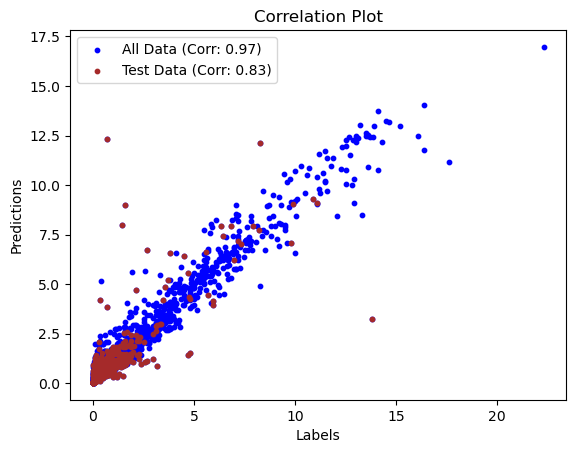

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from torch.utils.data import DataLoader, TensorDataset


# Assuming you already have features and labels loaded

# Convert tensors to numpy arrays
features_np = features
labels_np = labels

# Reshape the features to (num_samples, num_channels) if needed
features_np = features_np.reshape(features_np.shape[0], -1)

test_size=int(features.shape[0]/10)
train_size=features.shape[0]-test_size

# Split the data into training and testing sets
#test_size = 0.2  # You can adjust this percentage based on your needs
features_train, features_test, labels_train, labels_test = train_test_split(
    features_np, labels_np, test_size=test_size, random_state=42
)

# Initialize Random Forest regressor with 100 trees (you can adjust this parameter)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_regressor.fit(features_train, labels_train)

# Predict on the test set
test_predictions = rf_regressor.predict(features_test)
all_predictions = rf_regressor.predict(features_np)

# Calculate the correlation coefficient for test data
corr_test, _ = pearsonr(labels_test, test_predictions)
print(f"Correlation coefficient on test data: {corr_test}")
corr_all, _ = pearsonr(labels_np, all_predictions)
print(f"Correlation coefficient on all data: {corr_all}")

# Create a scatter plot for both test and all data
plt.figure()
plt.scatter(labels_np, all_predictions, c="blue", label=f'All Data (Corr: {corr_all:.2f})', s=10)
plt.scatter(labels_test, test_predictions, c="brown", label=f'Test Data (Corr: {corr_test:.2f})', s=10)

plt.xlabel("Labels")
plt.ylabel("Predictions")
plt.legend()
plt.title("Correlation Plot")
plt.show()

In [6]:
"""
np.save("all_labels_RF_CS", labels_np)
np.save("all_predictions_RF_CS", all_predictions)
np.save("test_labels_RF_CS", labels_test)
np.save("test_predictions_RF_CS", test_predictions)
"""

'\nnp.save("all_labels_RF_CS", labels_np)\nnp.save("all_predictions_RF_CS", all_predictions)\nnp.save("test_labels_RF_CS", labels_test)\nnp.save("test_predictions_RF_CS", test_predictions)\n'

In [7]:
from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
import os
import gc

from os import walk


#os.chdir("/gxfs_work1/cau/sunms498/work/david/NN4SedRatePred/models/MLP/SedRate_MAR/models_torch/")



feature_path = Path().resolve().parents[1] / "data" / "interim" / "inputfeatures" / "SedTOCFeaturesnoNAN_TOC_CS_men"
X_mean = np.load(Path(feature_path / "features_mean.npy")).astype(float)
X_std = np.load(Path(feature_path / "features_std.npy")).astype(float)

dataset_path = Path().resolve().parents[1] / "data" / "interim" / "worldfeatures" / "WorldFeaturesAllnoNaN_SedTOC"

files = []

for (dirpath, dirnames, filenames) in walk(dataset_path):
    files.extend(filenames)
    break

files.sort()


features = np.load(Path(dataset_path / files[0]))



In [8]:


features = np.load(Path(dataset_path / files[0]))

chunk_shape = [6,4320] #360 chunks


first_run = True
ii = 0

for count, file in enumerate(files):
    features = np.load(Path(dataset_path / file))
    features = np.divide((features - X_mean), X_std)
    


    # Perform multiple forward passes with dropout
    num_samples = 100  # Adjust this based on your requirements
    #predictions = np.zeros((chunk_shape[0], chunk_shape[1]))

    predictions = rf_regressor.predict(features)
    predictions= predictions.reshape([chunk_shape[0], chunk_shape[1]])

    # Average predictions over all samples
    #predictions_avg = np.mean(predictions_sum, axis=0)
    #predictions_var = np.var(predictions_sum, axis=0)

    if first_run:
        prediction_map2 = predictions
        #prediction_map2_var = predictions_var
        first_run = False
    else:
        prediction_map2 = np.append(prediction_map2, predictions, axis=0)
        #prediction_map2_var = np.append(prediction_map2_var, predictions_var, axis=0)

    ii += 1
    print("Prediction " + str(ii) + " done!")

    del features
    gc.collect()
    
    


Prediction 1 done!
Prediction 2 done!
Prediction 3 done!
Prediction 4 done!
Prediction 5 done!
Prediction 6 done!
Prediction 7 done!
Prediction 8 done!
Prediction 9 done!
Prediction 10 done!
Prediction 11 done!
Prediction 12 done!
Prediction 13 done!
Prediction 14 done!
Prediction 15 done!
Prediction 16 done!
Prediction 17 done!
Prediction 18 done!
Prediction 19 done!
Prediction 20 done!
Prediction 21 done!
Prediction 22 done!
Prediction 23 done!
Prediction 24 done!
Prediction 25 done!
Prediction 26 done!
Prediction 27 done!
Prediction 28 done!
Prediction 29 done!
Prediction 30 done!
Prediction 31 done!
Prediction 32 done!
Prediction 33 done!
Prediction 34 done!
Prediction 35 done!
Prediction 36 done!
Prediction 37 done!
Prediction 38 done!
Prediction 39 done!
Prediction 40 done!
Prediction 41 done!
Prediction 42 done!
Prediction 43 done!
Prediction 44 done!
Prediction 45 done!
Prediction 46 done!
Prediction 47 done!
Prediction 48 done!
Prediction 49 done!
Prediction 50 done!
Predictio

In [9]:
predictions.shape

(6, 4320)

In [10]:
land_file = Path().resolve().parents[1] / "data" / "raw" / "island_map.npy"
land_map = np.load(land_file)
land_map[np.isnan(land_map)] = 1
#prediction_map2[land_map] = 0

#plt.figure(figsize=[25,15], dpi=200)

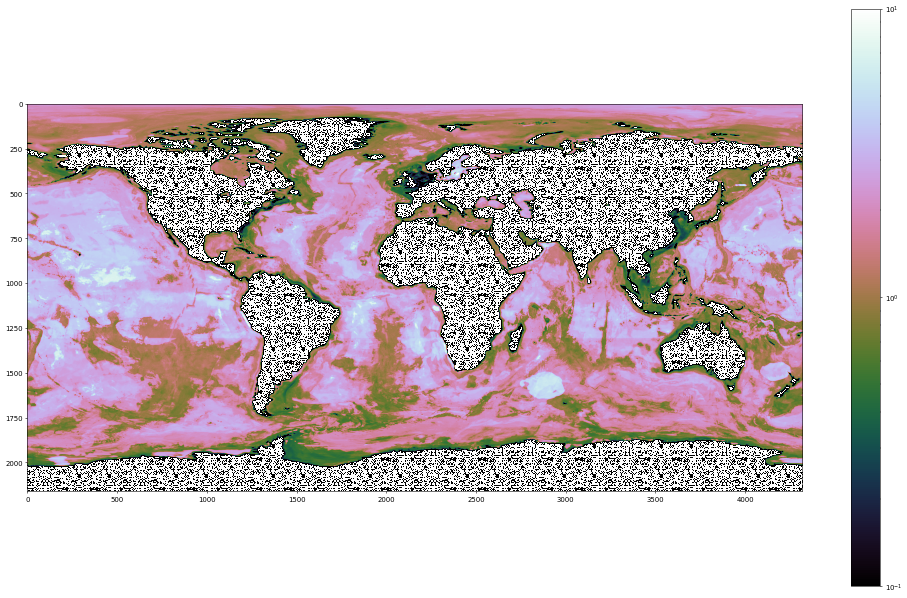

In [11]:
import matplotlib.colors as mcolors
prediction_map2 = np.rot90(np.rot90(np.fliplr(prediction_map2)))
plt.figure(figsize=[25, 15], dpi=50)
prediction_map2[land_map] = 0
plt.imshow(prediction_map2, norm=mcolors.LogNorm(vmin=1e-1, vmax=1e1),cmap="cubehelix")
cbar = plt.colorbar()

In [12]:
np.save(Path().resolve().parents[1] / "data" / "output" / "predictionmaps_TOC" / "prediction_map_TOC_supervised_men_CS_RF.npy", prediction_map2)